In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from config import TECHNOLOGIES

# Load data


In [76]:
df = pd.read_csv("data/vacancies.csv")
df.head()

,title,url,description,city
0,Senior Backend Engineer (Custom Models team),https://jobs.dou.ua/companies/datarobot/vacanc...,"DataRobot is the leader in Value-Driven AI, a ...","Київ, Львів, Хмельницький, віддалено"
1,Senior/Tech Lead Python + React.js Developer,https://jobs.dou.ua/companies/artelogic/vacanc...,We are seeking a Senior/Tech Lead Python + Rea...,"Львів, за кордоном, віддалено"
2,Senior Full Stack React/ Django Developer,https://jobs.dou.ua/companies/delphi-llc/vacan...,"Join us, the solution of Virtual Edge unifies ...","Київ, віддалено"
3,Python-розробник,https://jobs.dou.ua/companies/horeker/vacancie...,HOREKER. Ідеальне рішення для ресторанів від р...,віддалено
4,Senior Python Developer,https://jobs.dou.ua/companies/next-technology-...,For our client we are looking for candidates f...,віддалено


In [77]:
# Display information and descriptive statistics about the data
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        150 non-null    object
 1   url          150 non-null    object
 2   description  150 non-null    object
 3   city         150 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


,title,url,description,city
count,150,150,150,150
unique,123,150,150,35
top,Senior Python Developer,https://jobs.dou.ua/companies/datarobot/vacanc...,"DataRobot is the leader in Value-Driven AI, a ...",віддалено
freq,12,1,1,62


# Visualize the distribution of vacancies by cities


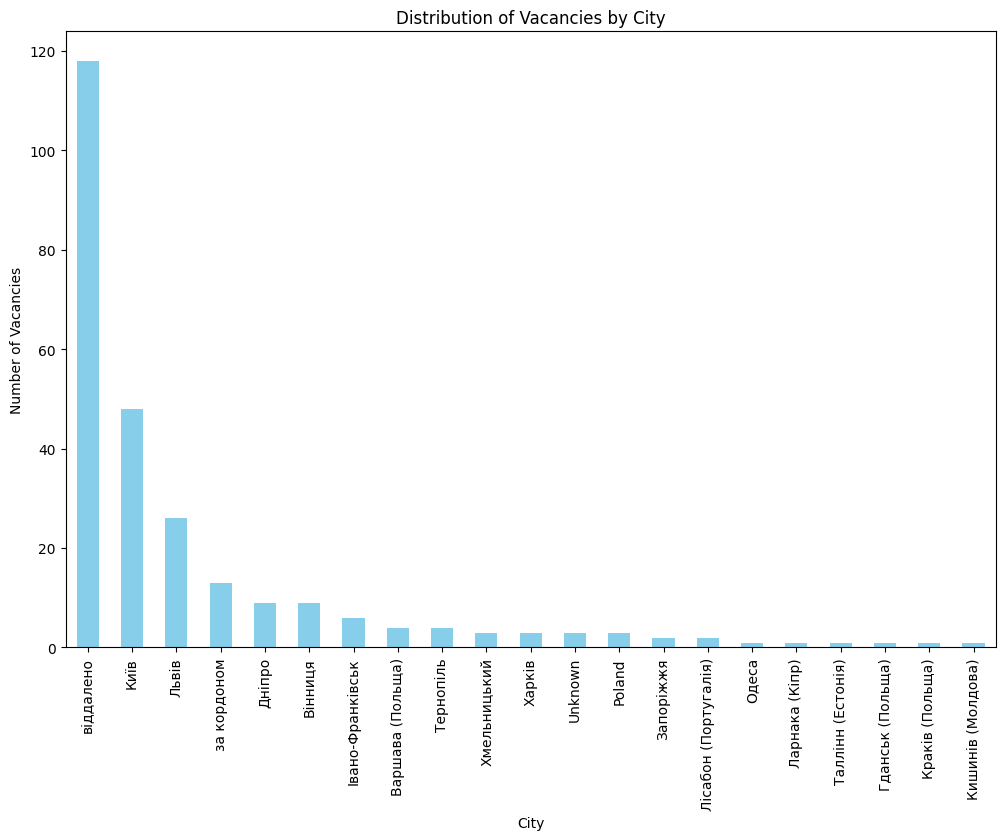

In [78]:
# Split all cities into separate values
df["city"] = df["city"].apply(lambda x: x.split(", "))

# Create a new DataFrame with exploded cities
df_exploded = df.explode("city")

# Examine the results
city_counts = df_exploded["city"].value_counts()

# Visualize the distribution of vacancies by cities
plt.figure(figsize=(12, 8))
city_counts.plot(kind="bar", color="skyblue")
plt.xlabel("City")
plt.ylabel("Number of Vacancies")
plt.title("Distribution of Vacancies by City")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Visualize the popularity of technologies in Python job descriptions


C:\Users\pukas\AppData\Local\Temp\ipykernel_17108\199814776.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="technology", y="count", data=tech_df, palette="viridis")


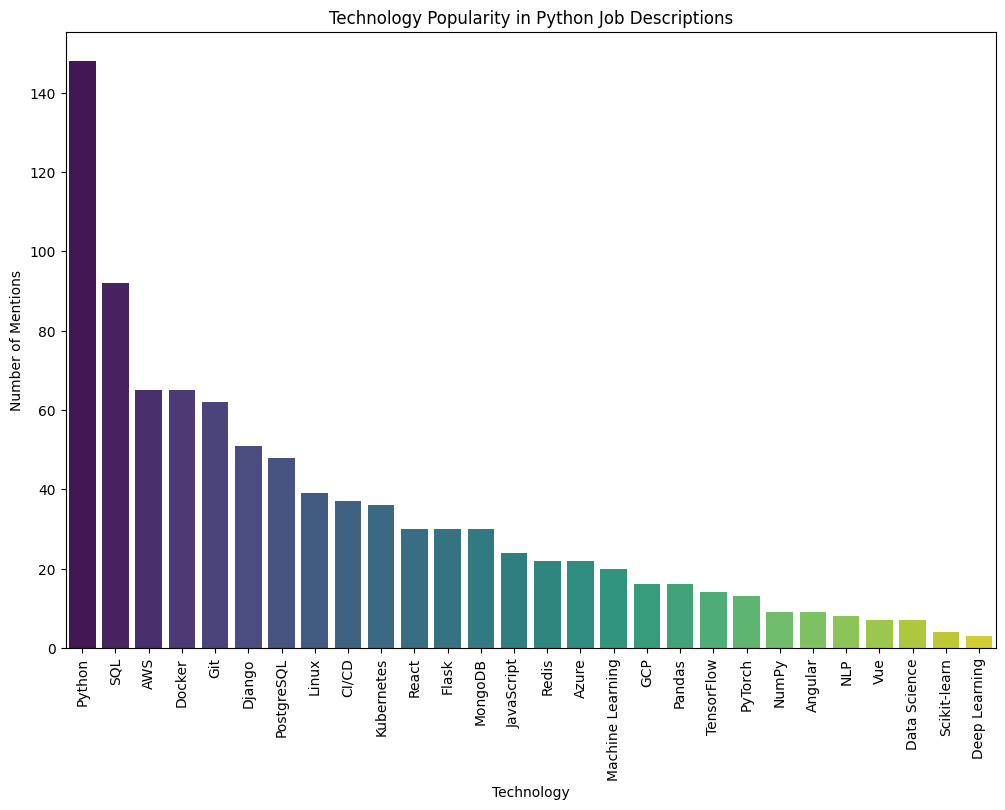

In [79]:
# Extract technologies from the job descriptions
def extract_technologies(text):
    text = text.lower()
    tech_in_text = [tech for tech in TECHNOLOGIES if tech.lower() in text]
    return tech_in_text


df["technologies"] = df["description"].apply(extract_technologies)
df_exploded["technologies"] = df["technologies"]

# Count the frequency of each technology
all_technologies = [tech for sublist in df["technologies"] for tech in sublist]
tech_counts = Counter(all_technologies)

tech_df = pd.DataFrame.from_dict(
    tech_counts, orient="index", columns=["count"]
).reset_index()
tech_df = tech_df.rename(columns={"index": "technology"})

tech_df = tech_df.sort_values(by="count", ascending=False)

# Visualize the popularity of technologies in Python job descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x="technology", y="count", data=tech_df, palette="viridis")
plt.xlabel("Technology")
plt.ylabel("Number of Mentions")
plt.title("Technology Popularity in Python Job Descriptions")
plt.xticks(rotation=90)
plt.show()

# Function to plot technology mentions by experience level


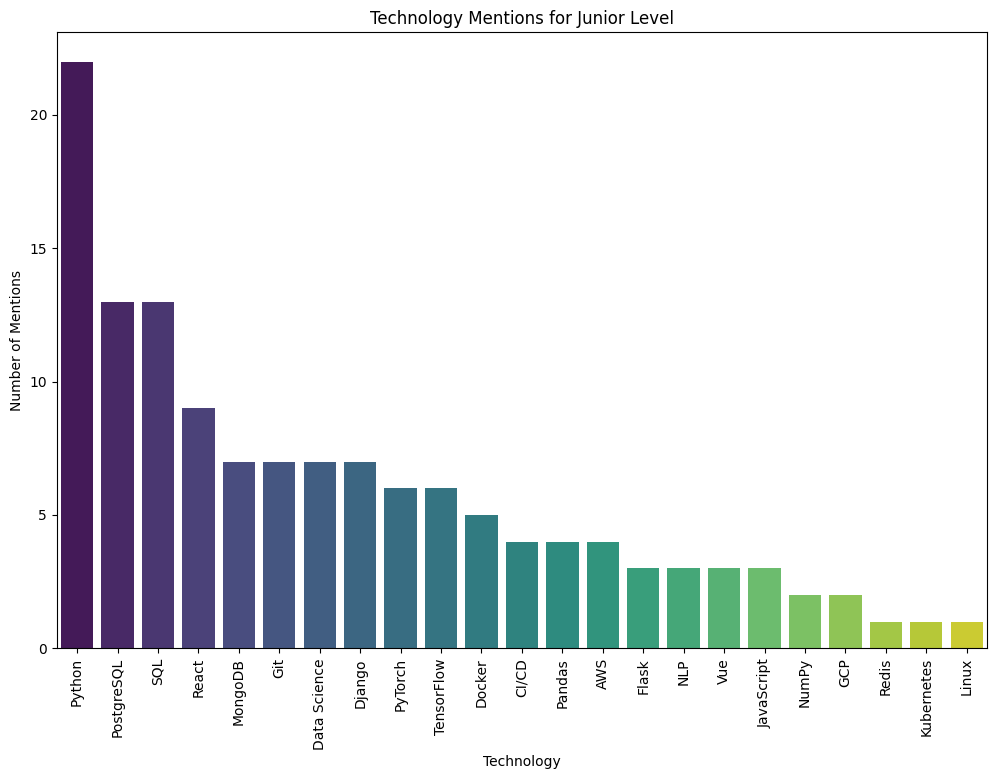

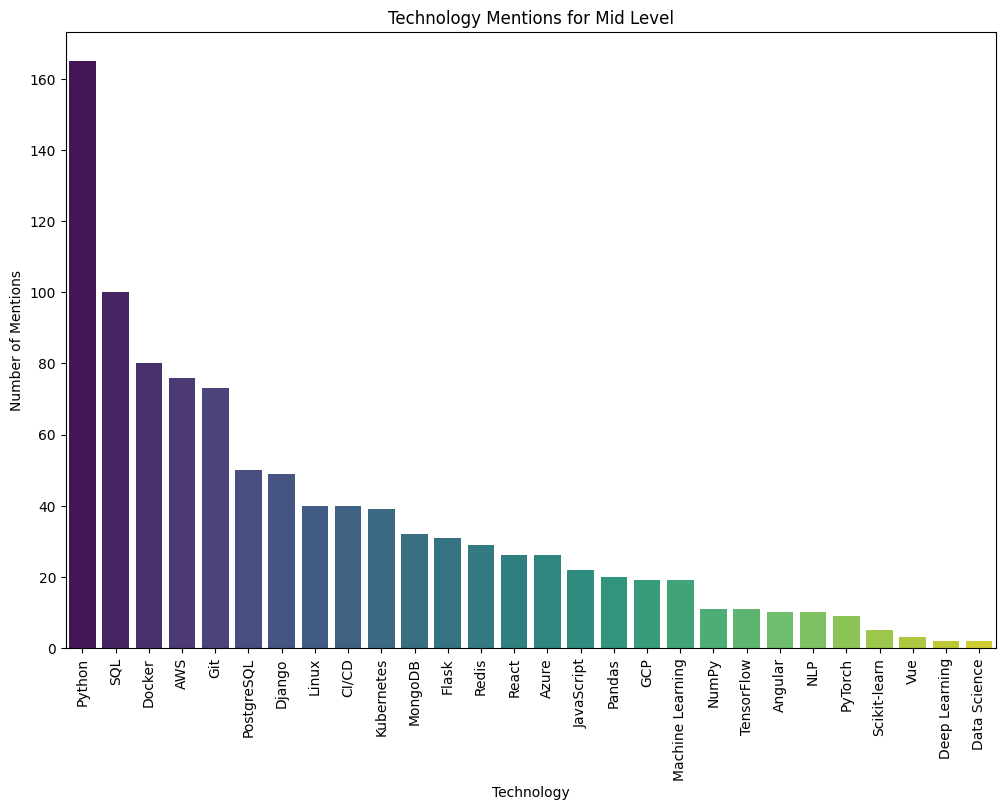

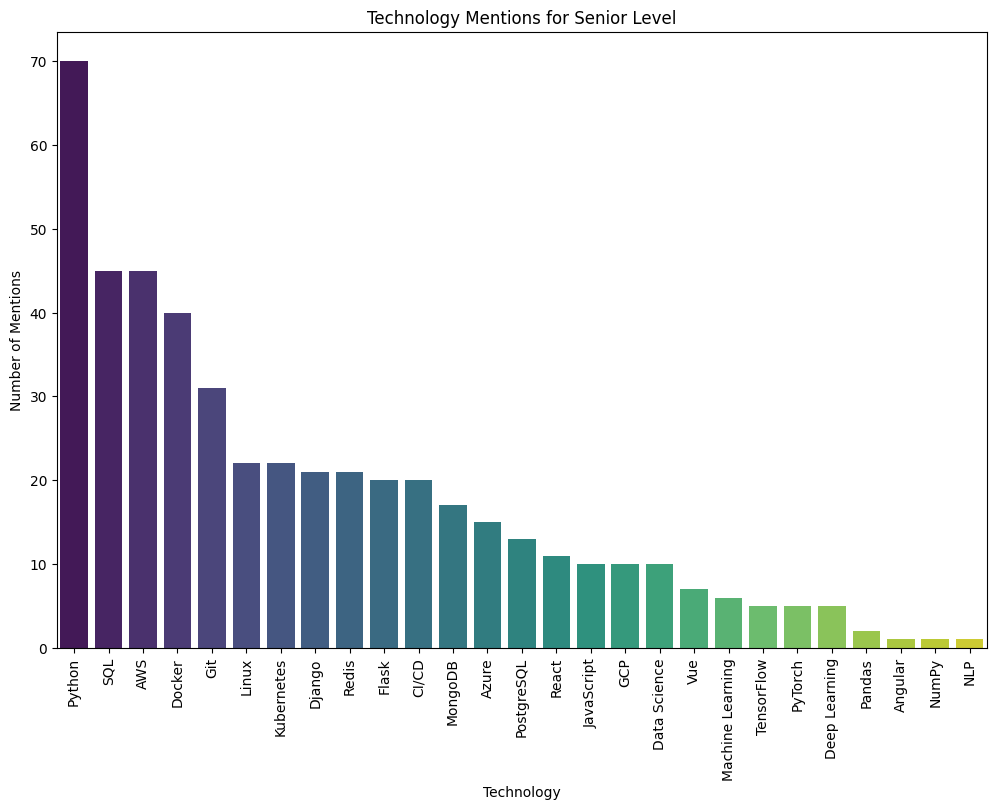

In [80]:
# Extract experience level from the job descriptions
df["experience_level"] = df["description"].apply(
    lambda x: (
        "Senior"
        if "senior" in x.lower()
        else ("Junior" if "junior" in x.lower() else "Mid")
    )
)
df_exploded["experience_level"] = df["experience_level"]


# Function to plot technology mentions by experience level
def plot_tech_by_experience_level(df, level):
    tech_counts = Counter(
        [
            tech
            for sublist in df[df["experience_level"] == level]["technologies"]
            for tech in sublist
        ]
    )
    tech_df = pd.DataFrame.from_dict(
        tech_counts, orient="index", columns=["count"]
    ).reset_index()
    tech_df = tech_df.rename(columns={"index": "technology"}).sort_values(
        by="count", ascending=False
    )

    plt.figure(figsize=(12, 8))
    sns.barplot(
        x="technology",
        y="count",
        data=tech_df,
        hue="technology",
        palette="viridis",
        legend=False,
    )
    plt.title(f"Technology Mentions for {level} Level")
    plt.xlabel("Technology")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=90)
    plt.show()


# Plot technology mentions for each experience level
for level in ["Junior", "Mid", "Senior"]:
    plot_tech_by_experience_level(df_exploded, level)